In [ ]:
!wget "https://files.grouplens.org/datasets/movielens/ml-25m.zip"
!unzip ml-25m.zip

--2024-05-01 03:58:33--  https://files.grouplens.org/datasets/movielens/ml-25m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261978986 (250M) [application/zip]
Saving to: ‘ml-25m.zip.1’

ml-25m.zip.1        100%[===================>] 249.84M  80.1MB/s    in 3.3s    

2024-05-01 03:58:37 (76.1 MB/s) - ‘ml-25m.zip.1’ saved [261978986/261978986]

Archive:  ml-25m.zip
replace ml-25m/tags.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
import numpy as np
movies_df = pd.read_csv('ml-25m/movies.csv')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings_df = pd.read_csv('ml-25m/ratings.csv', dtype={'movieId':int, 'userId':int})
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [ ]:
import matplotlib.pyplot as plt
counts = ratings_df.groupby(by=['rating'])['userId'].count()

Text(0, 0.5, 'Frequency')

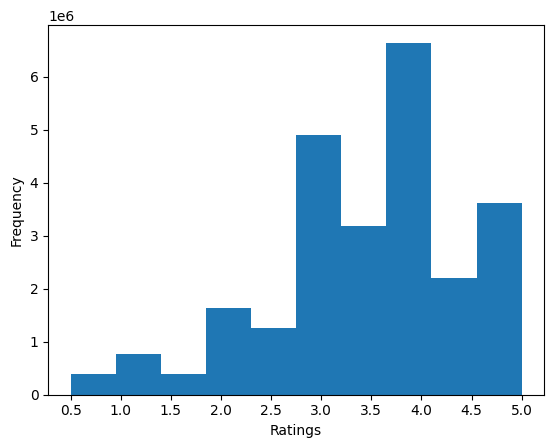

In [ ]:
plt.hist(counts.index, weights=counts)
plt.xticks(counts.index)
plt.xlabel('Ratings')
plt.ylabel('Frequency')

Most popular rating is 4 stars

In [ ]:
movies = ratings_df['movieId'].to_numpy(dtype=int)
ratings = ratings_df['rating'].to_numpy(dtype=float)
users = ratings_df['userId'].to_numpy(dtype=int)

In [ ]:
_ , frequency = np.unique(movies, return_counts=True)
freq_rank, movie_frequency = np.unique(frequency, return_counts=True)

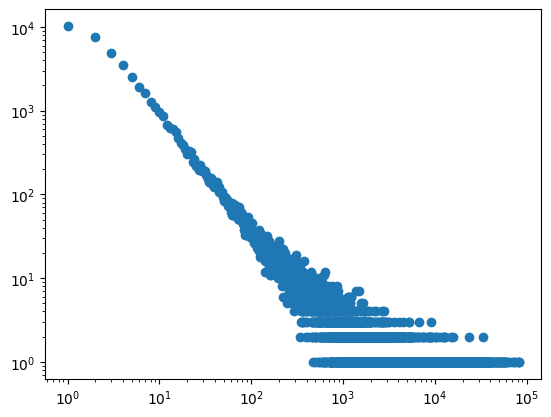

In [ ]:
plt.scatter(freq_rank, movie_frequency)
plt.xscale('log')
plt.yscale('log')

In [ ]:
_ , watch_freq = np.unique(users, return_counts=True)
watch_freq_rank, watch_freqs = np.unique(watch_freq, return_counts=True)

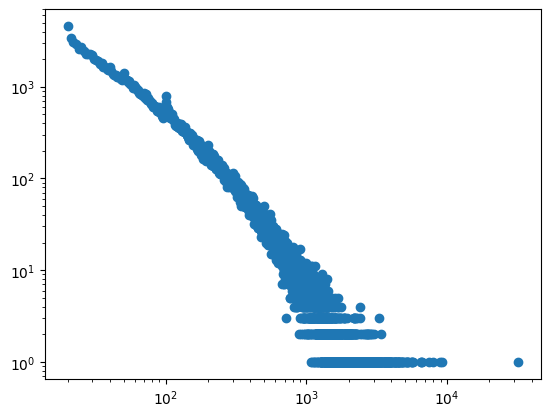

In [ ]:
plt.scatter(watch_freq_rank, watch_freqs)
plt.xscale('log')
plt.yscale('log')

In [ ]:
top_movies = ratings_df['movieId'].value_counts()[:5].index.tolist()
movies_df[movies_df['movieId'].isin(top_movies)]

## Dataset Generation

```python
final_user_df = ratings_df.groupby(by="userId", dropna=False)[['movieId', 'rating']].apply(lambda x: list(map(tuple, x.values)))
user_ratings_lister = final_user_df.values.tolist()
user_ref = final_user_df.index.tolist()

final_movie_df = ratings_df.groupby(by="movieId", dropna=False)[['userId', 'rating']].apply(lambda x: list(map(tuple, x.values)))
movie_ratings_lister = final_movie_df.values.tolist()
movie_refer = final_movie_df.index.tolist()
```

```python
movies = ratings_df['movieId'].to_numpy(dtype=int)
ratings = ratings_df['rating'].to_numpy(dtype=float)
users = ratings_df['userId'].to_numpy(dtype=int)

user_ref = []
user_ratings_list = []
user_list = []
for i, (user, movie, rating) in enumerate(zip(users, movies, ratings)):
  if i == 0:
    user_ref.append(user)
  if user_ref[-1] != user:
    user_ratings_list.append(user_list)
    user_ref.append(user)
    user_list = [(movie, rating)]
  else:
    user_list.append((movie, rating))

user_ratings_list.append(user_list)

movies_sorted_index = np.argsort(movies)
movies_sorted = movies[movies_sorted_index]
users_sorted = users[movies_sorted_index]
ratings_sorted = ratings[movies_sorted_index]

movie_ref = []
movie_ratings_list = []
movie_list = []
for i, (movie, user, rating) in enumerate(zip(movies_sorted, users_sorted, ratings_sorted)):
  if i == 0:
    movie_ref.append(movie)
  if movie_ref[-1] != movie:
    movie_ratings_list.append(movie_list)
    movie_ref.append(movie)
    movie_list = [(user, rating)]
  else:
    movie_list.append((user, rating))

movie_ratings_list.append(movie_list)
```

In [ ]:
!wget -O 'ml-100k.zip' 'https://files.grouplens.org/datasets/movielens/ml-latest-small.zip'

!unzip ml-100k.zip

--2024-05-01 03:59:16--  https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>] 955.28K  4.52MB/s    in 0.2s    

2024-05-01 03:59:17 (4.52 MB/s) - ‘ml-100k.zip’ saved [978202/978202]

Archive:  ml-100k.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
ratings_df = pd.read_csv('ml-latest-small/ratings.csv')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
movies = ratings_df['movieId'].to_numpy(dtype=int)
ratings = ratings_df['rating'].to_numpy(dtype=float)
users = ratings_df['userId'].to_numpy(dtype=int)

```python
userid_to_index = {userid:index for index, userid in enumerate(ratings_df['userId'].unique())}
index_to_userid = list(userid_to_index.keys())
movieid_to_index = {movieid:index for index, movieid in enumerate(ratings_df['movieId'].unique())}
index_to_movieid = list(movieid_to_index.keys())
movie_ratings_list = [[] for _ in range(len(index_to_movieid))]
user_ratings_list = [[] for _ in range(len(userid_to_index))]

for (user, movie, rating) in zip(users, movies, ratings):
  movie_index = movieid_to_index.get(movie)
  user_index = userid_to_index.get(user)
  user_ratings_list[user_index].append((movie_index, rating))
  movie_ratings_list[movie_index].append((user_index, rating))

```

```python
userid_to_index = {}
index_to_userid = []
movieid_to_index = {}
index_to_movieid = []
movie_ratings_list = []
user_ratings_list = []

for (user, movie, rating) in zip(users, movies, ratings):
  if movieid_to_index.get(movie) is not None:
    movie_index = movieid_to_index.get(movie)
  else:
    movie_index = len(movieid_to_index)
    index_to_movieid.append(movie)
    movieid_to_index[movie] = movie_index
    movie_ratings_list.append([])
  if userid_to_index.get(user) is not None:
    user_index = userid_to_index.get(user)
  else:
    user_index = len(userid_to_index)
    index_to_userid.append(user)
    userid_to_index[user] = user_index
    user_ratings_list.append([])

  user_ratings_list[user_index].append((movie_index, rating))
  movie_ratings_list[movie_index].append((user_index, rating))
```

In [ ]:
rng = np.random.default_rng(2024)

userid_to_index = {}
index_to_userid = []
movieid_to_index = {}
index_to_movieid = []
train_movie_ratings_list = []
test_movie_ratings_list = []
train_user_ratings_list = []
test_user_ratings_list = []
# movie_ratings_list = []
# user_ratings_list = []

for (user, movie, rating) in zip(users, movies, ratings):
  if movieid_to_index.get(movie) is not None:
    movie_index = movieid_to_index.get(movie)
  else:
    movie_index = len(movieid_to_index)
    index_to_movieid.append(movie)
    movieid_to_index[movie] = movie_index
    train_movie_ratings_list.append([])
    test_movie_ratings_list.append([])
    # movie_ratings_list.append([])

  if userid_to_index.get(user) is not None:
    user_index = userid_to_index.get(user)
  else:
    user_index = len(userid_to_index)
    index_to_userid.append(user)
    userid_to_index[user] = user_index
    train_user_ratings_list.append([])
    test_user_ratings_list.append([])
    # user_ratings_list.append([])

  # user_ratings_list[user_index].append((movie_index, rating))
  # movie_ratings_list[movie_index].append((user_index, rating))

  if rng.uniform(0, 1) < 0.8:
    train_user_ratings_list[user_index].append((movie_index, rating))
    train_movie_ratings_list[movie_index].append((user_index, rating))
  else:
    test_user_ratings_list[user_index].append((movie_index, rating))
    test_movie_ratings_list[movie_index].append((user_index, rating))

In [ ]:
import pickle
import lzma

with lzma.open('general_movielens.xz', 'wb') as f:
  pickle.dump((userid_to_index, index_to_userid, movieid_to_index, index_to_movieid), f, 4)

In [ ]:
import pickle

with lzma.open('movie_data_movielens.xz', 'wb') as f:
  pickle.dump((train_movie_ratings_list, test_movie_ratings_list), f, 4)

In [ ]:
import pickle

with open('user_data_movielens.pkl', 'wb') as f:
  pickle.dump((train_user_ratings_list, test_user_ratings_list), f, 4)

## Bias Training

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
M = len(user_ratings_list)
N = len(movie_ratings_list)

user_biases = np.zeros((M))
item_biases = np.zeros((N))

# Hyperparameters
n_epochs = 200
lmb = 0.05
gamma = 0.05

losses = []
rmses = []

for i in tqdm(range(n_epochs)):
  for m in range(M):
    bias = 0
    item_counter = 0
    for (n, r) in user_ratings_list[m]:
      bias += lmb * (r - item_biases[n])
      item_counter += 1
    bias = bias / (lmb * item_counter + gamma)
    user_biases[m] = bias

  for n in range(N):
    bias = 0
    user_counter = 0
    for (m, r) in movie_ratings_list[n]:
      bias += lmb * (r - user_biases[m])
      user_counter += 1
    bias = bias / (lmb * user_counter + gamma)
    item_biases[n] = bias

  error_squared = 0
  size = 0
  for m in range(M):
    for (n, r) in user_ratings_list[m]:
      error_squared += (r - (user_biases[m] + item_biases[n]))**2
      size += 1
  loss = -0.5*lmb*error_squared - 0.5*gamma*np.sum(user_biases**2) - 0.5*gamma*np.sum(item_biases**2)
  rmse = np.sqrt(1/size * error_squared)
  losses.append(loss)
  rmses.append(rmse)

  0%|          | 0/200 [00:00<?, ?it/s]

KeyboardInterrupt: 

## Full Training - 100k

In [ ]:
M = len(user_ratings_list)
N = len(movie_ratings_list)

user_biases = np.zeros((M))
item_biases = np.zeros((N))

k = 10

U = np.random.normal(loc=0.0, scale=1/np.sqrt(k), size=(M, k))
V = np.random.normal(loc=0.0, scale=1/np.sqrt(k), size=(N, k))

# Hyperparameters
n_epochs = 75
lmb = 1
gamma = 1e-3
tau = 5e-2

losses = []
rmses = []

for i in tqdm(range(n_epochs)):
  for m in range(M):
    bias = 0
    item_counter = 0
    left = 0
    right = 0
    for (n, r) in user_ratings_list[m]:
      bias += lmb * (r - U[m].T.dot(V[n]) - item_biases[n])
      item_counter += 1
    bias = bias / (lmb * item_counter + gamma)
    user_biases[m] = bias

    for (n, r) in user_ratings_list[m]:
      left += V[n]*V[n].reshape(-1, 1)
      right += V[n]*(r - user_biases[m] - item_biases[n])
    U[m] = np.linalg.solve(lmb*left + tau*np.eye(k), lmb*right)


  for n in range(N):
    bias = 0
    user_counter = 0
    left = 0
    right = 0
    for (m, r) in movie_ratings_list[n]:
      bias += lmb * (r - U[m].T.dot(V[n]) - user_biases[m])
      user_counter += 1
    bias = bias / (lmb * user_counter + gamma)
    item_biases[n] = bias

    for (m, r) in movie_ratings_list[n]:
      left += U[m]*U[m].reshape(-1, 1)
      right += U[m]*(r - user_biases[m] - item_biases[n])
    V[n] = np.linalg.solve(lmb*left + tau*np.eye(k), lmb*right)

  error_squared = 0
  size = 0
  for m in range(M):
    for (n, r) in user_ratings_list[m]:
      error_squared += (r - (U[m].T.dot(V[n]) + user_biases[m] + item_biases[n]))**2
      size += 1
  loss = -0.5*lmb*error_squared - 0.5*gamma*np.sum(user_biases**2) - 0.5*gamma*np.sum(item_biases**2) - 0.5*tau*(np.einsum('ij, ij->', V, V) + np.einsum('ij, ij->', U, U))
  rmse = np.sqrt(1/size * error_squared)
  losses.append(loss)
  rmses.append(rmse)

  0%|          | 0/75 [00:00<?, ?it/s]

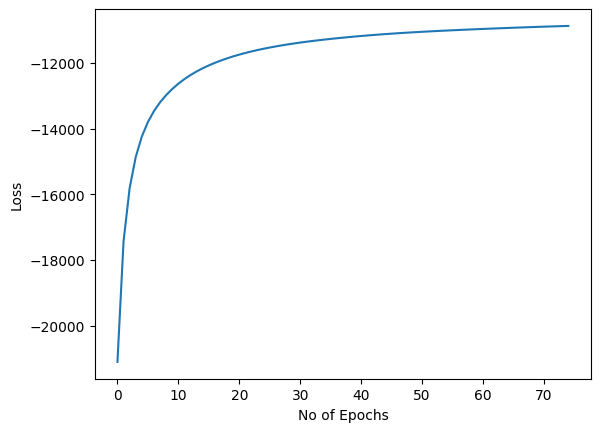

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel('No of Epochs')
plt.ylabel('Loss')
plt.show()

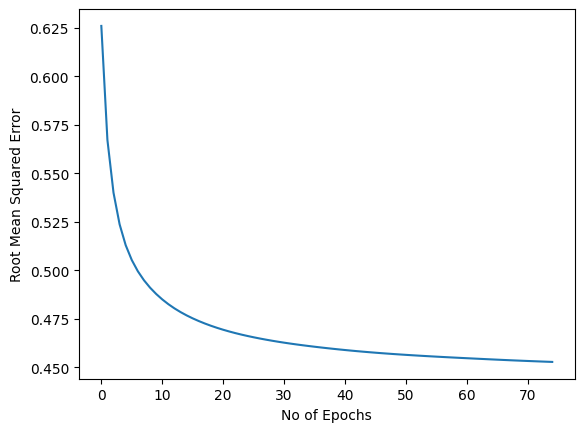

In [ ]:
plt.plot(rmses)
plt.xlabel('No of Epochs')
plt.ylabel('Root Mean Squared Error')
plt.show()

## Full 25M training

In [ ]:
M = len(train_user_ratings_list)
N = len(train_movie_ratings_list)

user_biases = np.zeros((M))
item_biases = np.zeros((N))

k = 10

U = np.random.normal(loc=0.0, scale=1/np.sqrt(k), size=(M, k))
V = np.random.normal(loc=0.0, scale=1/np.sqrt(k), size=(N, k))

# Hyperparameters
n_epochs = 100
lmb = 1
gamma = 1e-3
tau = 5e-2

train_losses = []
train_rmses = []
test_losses = []
test_rmses = []

for i in tqdm(range(n_epochs)):
  for m in range(M):
    bias = 0
    item_counter = 0
    left = 0
    right = 0
    for (n, r) in train_user_ratings_list[m]:
      bias += lmb * (r - U[m].T.dot(V[n]) - item_biases[n])
      item_counter += 1
    bias = bias / (lmb * item_counter + gamma)
    user_biases[m] = bias

    for (n, r) in train_user_ratings_list[m]:
      left += V[n]*V[n].reshape(-1, 1)
      right += V[n]*(r - user_biases[m] - item_biases[n])
    U[m] = np.linalg.solve(lmb*left + tau*np.eye(k), lmb*right)


  for n in range(N):
    bias = 0
    user_counter = 0
    left = 0
    right = 0
    for (m, r) in train_movie_ratings_list[n]:
      bias += lmb * (r - U[m].T.dot(V[n]) - user_biases[m])
      user_counter += 1
    bias = bias / (lmb * user_counter + gamma)
    item_biases[n] = bias

    for (m, r) in train_movie_ratings_list[n]:
      left += U[m]*U[m].reshape(-1, 1)
      right += U[m]*(r - user_biases[m] - item_biases[n])
    V[n] = np.linalg.solve(lmb*left + tau*np.eye(k), lmb*right)

  error_squared = 0
  size = 0
  for m in range(M):
    for (n, r) in train_user_ratings_list[m]:
      train_error_squared += (r - (U[m].T.dot(V[n]) + user_biases[m] + item_biases[n]))**2
      size += 1
    for (n, r) in test_user_ratings_list[m]:
      test_error_squared += (r - (U[m].T.dot(V[n]) + user_biases[m] + item_biases[n]))**2
      size += 1
  train_loss = -0.5*lmb*train_error_squared - 0.5*gamma*np.sum(user_biases**2) - 0.5*gamma*np.sum(item_biases**2) - 0.5*tau*(np.einsum('ij, ij->', V, V) + np.einsum('ij, ij->', U, U))
  train_rmse = np.sqrt(1/size * train_error_squared)
  train_losses.append(train_loss)
  train_rmses.append(train_rmse)

  test_loss = -0.5*lmb*test_error_squared - 0.5*gamma*np.sum(user_biases**2) - 0.5*gamma*np.sum(item_biases**2) - 0.5*tau*(np.einsum('ij, ij->', V, V) + np.einsum('ij, ij->', U, U))
  test_rmse = np.sqrt(1/size * test_error_squared)
  test_losses.append(test_loss)
  test_rmses.append(test_rmse)